In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 7)

print("✓ Libraries imported successfully")
print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✓ Libraries imported successfully
Analysis Date: 2025-12-06 19:32:01


In [3]:
df = pd.read_csv(r'D:\My projects\customer_segmentation_project\data\processed\step1_cleaned_data.csv')

print(f"✓ Data loaded successfully")
print(f"  Shape: {df.shape[0]:,} customers, {df.shape[1]} features")
print(f"\nFirst 5 rows:")
df.head()

✓ Data loaded successfully
  Shape: 2,229 customers, 34 features

First 5 rows:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Spending,Total_Purchases,Children,Customer_Tenure_Days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,67,1617,25,0,663
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,70,27,6,2,113
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,59,776,21,0,312
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,40,53,8,1,139
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,43,422,19,1,161


In [4]:
# Calculate RFM values
df['R_Value'] = df['Recency']  # Days since last purchase
df['F_Value'] = df['Total_Purchases']  # Total number of purchases
df['M_Value'] = df['Total_Spending']  # Total spending

print("✓ RFM Values calculated\n")
print("RFM Raw Metrics Summary:")
df[['R_Value', 'F_Value', 'M_Value']].describe()

✓ RFM Values calculated

RFM Raw Metrics Summary:


,R_Value,F_Value,M_Value
count,2229.000000,2229.000000,2229.000000
mean,49.106326,14.869000,605.541050
std,28.946476,7.622187,601.032228
min,0.000000,0.000000,5.000000
25%,24.000000,8.000000,69.000000
50%,49.000000,15.000000,397.000000
75%,74.000000,21.000000,1044.000000
max,99.000000,43.000000,2525.000000


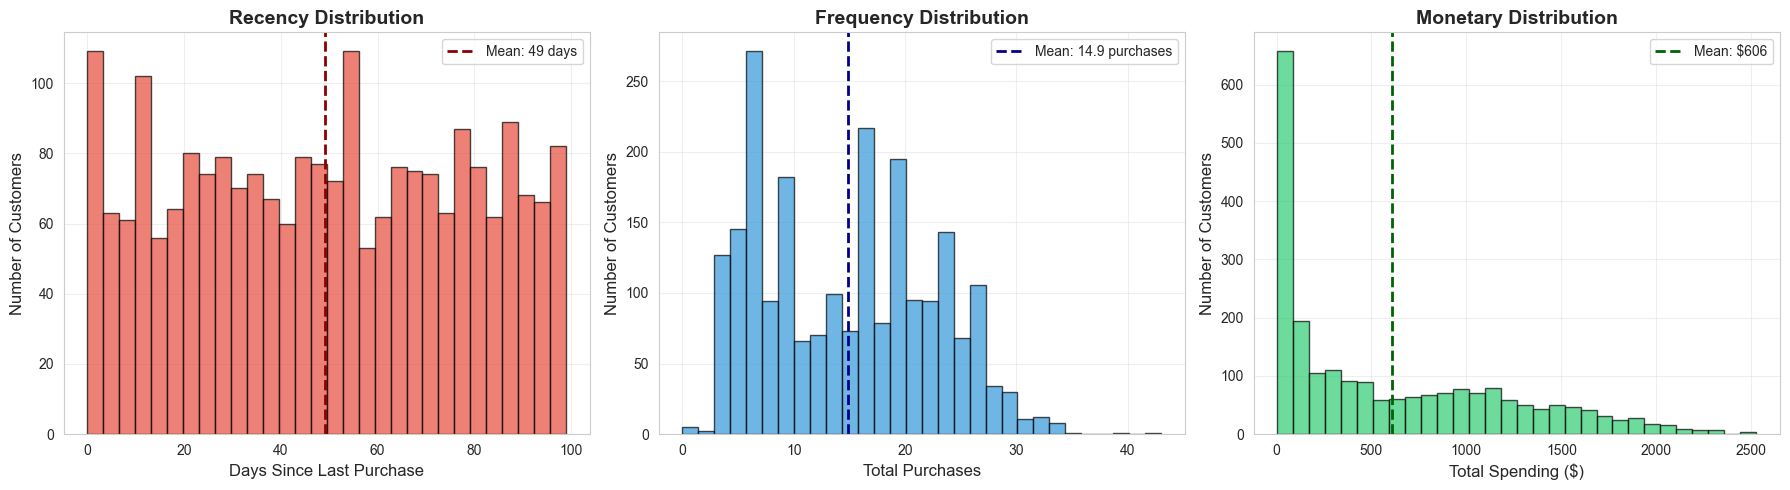

In [5]:
# Create distribution plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Recency distribution
axes[0].hist(df['R_Value'], bins=30, color='#e74c3c', alpha=0.7, edgecolor='black')
axes[0].axvline(df['R_Value'].mean(), color='darkred', linestyle='--', linewidth=2, 
                label=f'Mean: {df["R_Value"].mean():.0f} days')
axes[0].set_xlabel('Days Since Last Purchase', fontsize=12)
axes[0].set_ylabel('Number of Customers', fontsize=12)
axes[0].set_title('Recency Distribution', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Frequency distribution
axes[1].hist(df['F_Value'], bins=30, color='#3498db', alpha=0.7, edgecolor='black')
axes[1].axvline(df['F_Value'].mean(), color='darkblue', linestyle='--', linewidth=2, 
                label=f'Mean: {df["F_Value"].mean():.1f} purchases')
axes[1].set_xlabel('Total Purchases', fontsize=12)
axes[1].set_ylabel('Number of Customers', fontsize=12)
axes[1].set_title('Frequency Distribution', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

# Monetary distribution
axes[2].hist(df['M_Value'], bins=30, color='#2ecc71', alpha=0.7, edgecolor='black')
axes[2].axvline(df['M_Value'].mean(), color='darkgreen', linestyle='--', linewidth=2, 
                label=f'Mean: ${df["M_Value"].mean():.0f}')
axes[2].set_xlabel('Total Spending ($)', fontsize=12)
axes[2].set_ylabel('Number of Customers', fontsize=12)
axes[2].set_title('Monetary Distribution', fontsize=14, fontweight='bold')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [6]:
# Create RFM Scores
try:
    # Recency: Lower is better, so reverse scoring
    df['R_Score'] = pd.qcut(df['R_Value'], q=5, labels=[5, 4, 3, 2, 1], duplicates='drop')
    print("✓ Recency scored using quintiles")
except:
    df['R_Score'] = pd.cut(df['R_Value'], bins=5, labels=[5, 4, 3, 2, 1], duplicates='drop')
    print("✓ Recency scored using equal-width bins")

try:
    # Frequency: Higher is better
    df['F_Score'] = pd.qcut(df['F_Value'], q=5, labels=[1, 2, 3, 4, 5], duplicates='drop')
    print("✓ Frequency scored using quintiles")
except:
    df['F_Score'] = pd.cut(df['F_Value'], bins=5, labels=[1, 2, 3, 4, 5], duplicates='drop')
    print("✓ Frequency scored using equal-width bins")

try:
    # Monetary: Higher is better
    df['M_Score'] = pd.qcut(df['M_Value'], q=5, labels=[1, 2, 3, 4, 5], duplicates='drop')
    print("✓ Monetary scored using quintiles")
except:
    df['M_Score'] = pd.cut(df['M_Value'], bins=5, labels=[1, 2, 3, 4, 5], duplicates='drop')
    print("✓ Monetary scored using equal-width bins")

# Convert to numeric
df['R_Score'] = df['R_Score'].astype(int)
df['F_Score'] = df['F_Score'].astype(int)
df['M_Score'] = df['M_Score'].astype(int)

# Create RFM Segment String and Score
df['RFM_Segment'] = df['R_Score'].astype(str) + df['F_Score'].astype(str) + df['M_Score'].astype(str)
df['RFM_Score'] = df['R_Score'] + df['F_Score'] + df['M_Score']

print("\n✓ RFM Scores created\n")
print("Sample of RFM Scores:")
df[['ID', 'R_Value', 'F_Value', 'M_Value', 'R_Score', 'F_Score', 'M_Score', 
    'RFM_Segment', 'RFM_Score']].head(10)


✓ Recency scored using quintiles
✓ Frequency scored using quintiles
✓ Monetary scored using quintiles

✓ RFM Scores created

Sample of RFM Scores:


,ID,R_Value,F_Value,M_Value,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
0,5524,58,25,1617,3,5,5,355,13
1,2174,38,6,27,4,1,1,411,6
2,4141,26,21,776,4,4,4,444,12
3,6182,26,8,53,4,2,1,421,7
4,5324,94,19,422,1,4,3,143,8
5,7446,16,22,716,5,4,4,544,13
6,965,34,21,590,4,4,3,443,11
7,6177,32,10,169,4,2,2,422,8
8,4855,19,6,46,5,1,1,511,7
9,5899,68,2,49,2,1,1,211,4


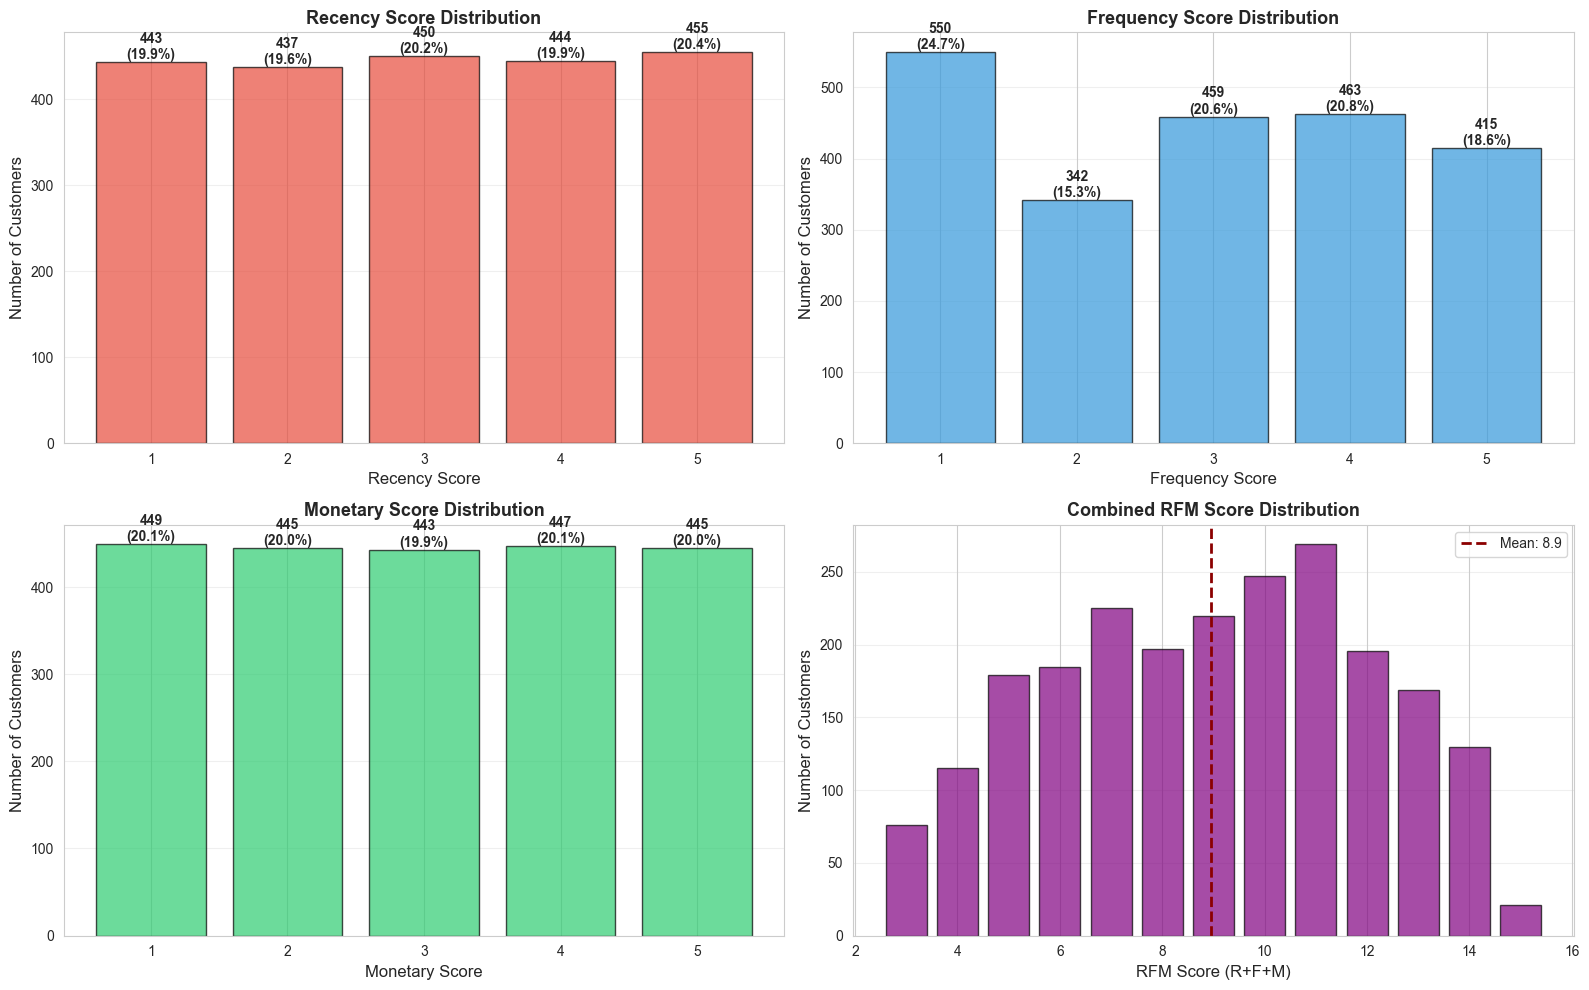

RFM Score Range: 3 to 15
Average RFM Score: 8.94


In [7]:
# Visualize RFM Score distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Individual score distributions
for idx, (score, color, title) in enumerate([('R_Score', '#e74c3c', 'Recency'), 
                                               ('F_Score', '#3498db', 'Frequency'), 
                                               ('M_Score', '#2ecc71', 'Monetary')]):
    ax = axes[idx // 2, idx % 2]
    score_counts = df[score].value_counts().sort_index()
    ax.bar(score_counts.index, score_counts.values, color=color, alpha=0.7, edgecolor='black')
    ax.set_xlabel(f'{title} Score', fontsize=12)
    ax.set_ylabel('Number of Customers', fontsize=12)
    ax.set_title(f'{title} Score Distribution', fontsize=13, fontweight='bold')
    ax.set_xticks([1, 2, 3, 4, 5])
    ax.grid(axis='y', alpha=0.3)
    
    # Add percentages on bars
    for i, v in enumerate(score_counts.values):
        ax.text(score_counts.index[i], v, f'{v}\n({v/len(df)*100:.1f}%)', 
                ha='center', va='bottom', fontweight='bold')

# Combined RFM Score
ax = axes[1, 1]
rfm_score_counts = df['RFM_Score'].value_counts().sort_index()
ax.bar(rfm_score_counts.index, rfm_score_counts.values, color='purple', alpha=0.7, edgecolor='black')
ax.set_xlabel('RFM Score (R+F+M)', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)
ax.set_title('Combined RFM Score Distribution', fontsize=13, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
ax.axvline(df['RFM_Score'].mean(), color='darkred', linestyle='--', linewidth=2, 
           label=f'Mean: {df["RFM_Score"].mean():.1f}')
ax.legend()

plt.tight_layout()
plt.show()

print(f"RFM Score Range: {df['RFM_Score'].min()} to {df['RFM_Score'].max()}")
print(f"Average RFM Score: {df['RFM_Score'].mean():.2f}")


In [8]:
def assign_rfm_segment(row):
    """
    Assign customer to a segment based on RFM scores
    """
    r, f, m = row['R_Score'], row['F_Score'], row['M_Score']
    
    # Champions: Best customers
    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'
    
    # Loyal Customers: Buy often
    elif r >= 3 and f >= 4:
        return 'Loyal Customers'
    
    # Potential Loyalists: Recent with average frequency
    elif r >= 4 and f >= 2 and f <= 3:
        return 'Potential Loyalists'
    
    # New Customers: Recent but low frequency
    elif r >= 4 and f == 1:
        return 'New Customers'
    
    # Promising: Recent but low spenders
    elif r >= 3 and f >= 1 and f <= 2 and m >= 1 and m <= 2:
        return 'Promising'
    
    # Need Attention: Average
    elif r >= 2 and r <= 3 and f >= 2 and f <= 3 and m >= 2 and m <= 3:
        return 'Need Attention'
    
    # About to Sleep: Below average
    elif r >= 2 and r <= 3 and f <= 2 and m <= 2:
        return 'About to Sleep'
    
    # At Risk: Made purchases before, not recently
    elif r <= 2 and f >= 2 and f <= 4 and m >= 2 and m <= 4:
        return 'At Risk'
    
    # Cannot Lose Them: Used to be best
    elif r <= 2 and f >= 4 and m >= 4:
        return 'Cannot Lose Them'
    
    # Hibernating: Long time inactive
    elif r <= 2 and f <= 2:
        return 'Hibernating'
    
    else:
        return 'Others'

# Apply segmentation
df['Customer_Segment'] = df.apply(assign_rfm_segment, axis=1)

print("✓ Customer segments assigned\n")
print("Segment Distribution:")
segment_counts = df['Customer_Segment'].value_counts()
segment_pct = (segment_counts / len(df) * 100).round(2)

segment_summary = pd.DataFrame({
    'Count': segment_counts,
    'Percentage': segment_pct
})
segment_summary

✓ Customer segments assigned

Segment Distribution:


,Count,Percentage
Customer_Segment,,
Potential Loyalists,335,15.03
Champions,277,12.43
At Risk,275,12.34
Loyal Customers,244,10.95
Cannot Lose Them,239,10.72
New Customers,224,10.05
Promising,177,7.94
Need Attention,158,7.09
Hibernating,123,5.52


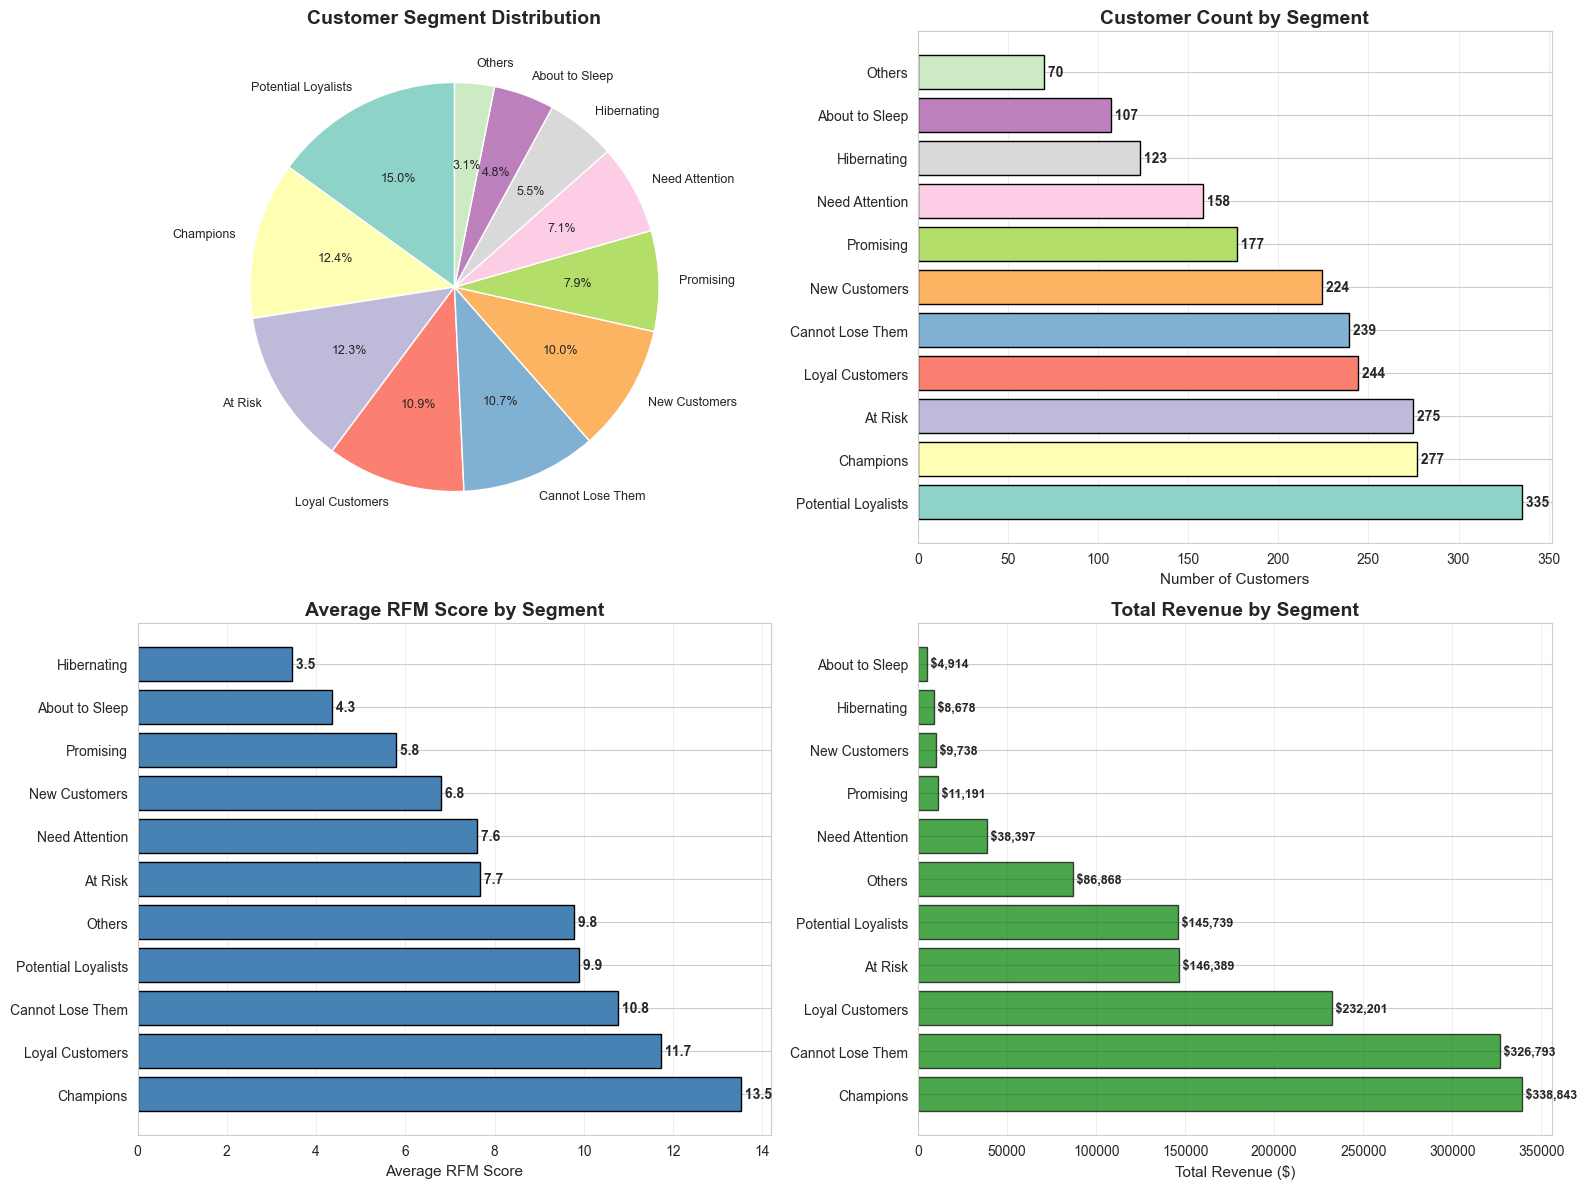

✓ Visualization saved to: outputs/figures/step2_rfm_segments.png


In [11]:
# Create comprehensive segment visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Pie chart
colors = plt.cm.Set3(range(len(segment_counts)))
axes[0, 0].pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%',
               colors=colors, startangle=90, textprops={'fontsize': 9})
axes[0, 0].set_title('Customer Segment Distribution', fontsize=14, fontweight='bold')

# 2. Bar chart
axes[0, 1].barh(range(len(segment_counts)), segment_counts.values, color=colors, edgecolor='black')
axes[0, 1].set_yticks(range(len(segment_counts)))
axes[0, 1].set_yticklabels(segment_counts.index)
axes[0, 1].set_xlabel('Number of Customers', fontsize=11)
axes[0, 1].set_title('Customer Count by Segment', fontsize=14, fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)

# Add counts on bars
for i, v in enumerate(segment_counts.values):
    axes[0, 1].text(v, i, f' {v}', va='center', fontweight='bold')

# 3. Average RFM Score by Segment
avg_rfm = df.groupby('Customer_Segment')['RFM_Score'].mean().sort_values(ascending=False)
axes[1, 0].barh(range(len(avg_rfm)), avg_rfm.values, color='steelblue', edgecolor='black')
axes[1, 0].set_yticks(range(len(avg_rfm)))
axes[1, 0].set_yticklabels(avg_rfm.index)
axes[1, 0].set_xlabel('Average RFM Score', fontsize=11)
axes[1, 0].set_title('Average RFM Score by Segment', fontsize=14, fontweight='bold')
axes[1, 0].grid(axis='x', alpha=0.3)

# Add scores on bars
for i, v in enumerate(avg_rfm.values):
    axes[1, 0].text(v, i, f' {v:.1f}', va='center', fontweight='bold')

# 4. Total Revenue by Segment
revenue = df.groupby('Customer_Segment')['M_Value'].sum().sort_values(ascending=False)
axes[1, 1].barh(range(len(revenue)), revenue.values, color='green', alpha=0.7, edgecolor='black')
axes[1, 1].set_yticks(range(len(revenue)))
axes[1, 1].set_yticklabels(revenue.index)
axes[1, 1].set_xlabel('Total Revenue ($)', fontsize=11)
axes[1, 1].set_title('Total Revenue by Segment', fontsize=14, fontweight='bold')
axes[1, 1].grid(axis='x', alpha=0.3)

# Add revenue on bars
for i, v in enumerate(revenue.values):
    axes[1, 1].text(v, i, f' ${v:,.0f}', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig(r'D:\My projects\customer_segmentation_project\outputs\figures/step2_rfm_segments.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization saved to: outputs/figures/step2_rfm_segments.png")

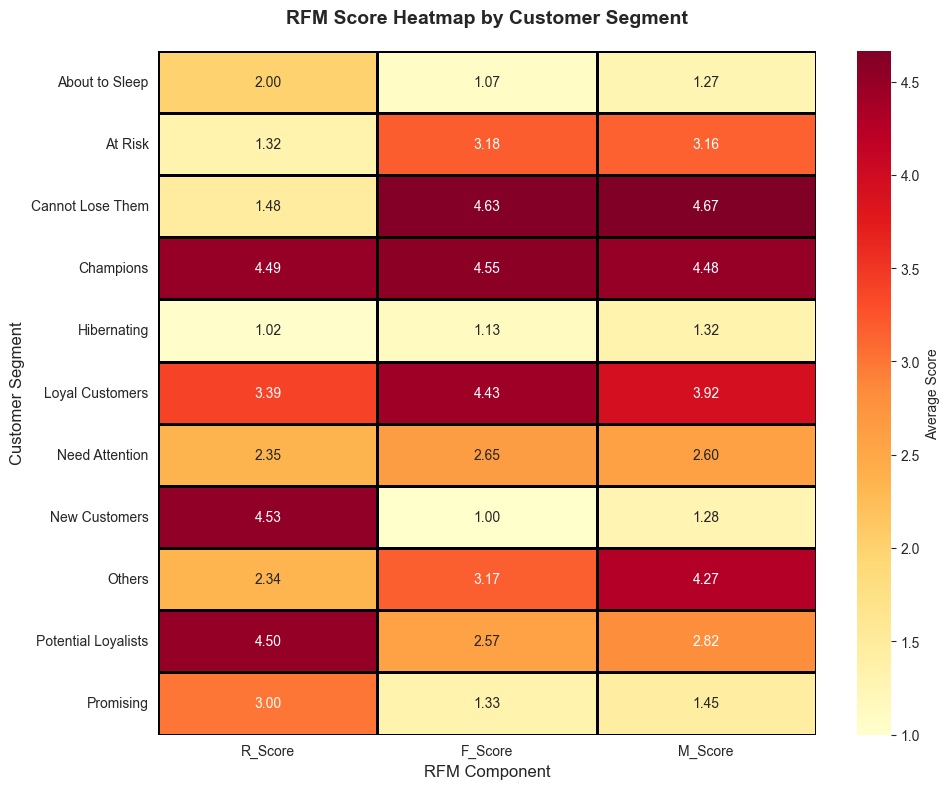

✓ Heatmap saved to: outputs/figures/step2_rfm_heatmap.png


In [12]:
# Create RFM heatmap
fig, ax = plt.subplots(figsize=(10, 8))

rfm_pivot = df.groupby('Customer_Segment')[['R_Score', 'F_Score', 'M_Score']].mean()
sns.heatmap(rfm_pivot, annot=True, fmt='.2f', cmap='YlOrRd', ax=ax, 
            cbar_kws={'label': 'Average Score'}, linewidths=1, linecolor='black')

ax.set_title('RFM Score Heatmap by Customer Segment', fontsize=14, fontweight='bold', pad=20)
ax.set_ylabel('Customer Segment', fontsize=12)
ax.set_xlabel('RFM Component', fontsize=12)

plt.tight_layout()
plt.savefig('D://My projects/customer_segmentation_project/outputs/figures/step2_rfm_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Heatmap saved to: outputs/figures/step2_rfm_heatmap.png")

SEGMENT: Champions

📊 Segment Size: 277 customers (12.43%)

💰 Financial Metrics:
  • Average Spending: $1,223.26
  • Total Revenue: $338,843.00
  • Average Purchases: 23.6

📅 Engagement Metrics:
  • Average Recency: 19 days
  • Average RFM Score: 13.53/15

👤 Demographics:
  • Average Age: 56.4 years
  • Average Income: $70,428

📋 Sample Customers:


,ID,R_Score,F_Score,M_Score,RFM_Score,Age,Income,Total_Spending
2,4141,4,4,4,12,59,71613.0,776
5,7446,5,4,4,13,57,62513.0,716
15,2114,4,5,5,14,78,82800.0,1315
27,5255,5,5,4,14,38,51381.5,637
34,8755,5,4,5,14,78,68657.0,1196


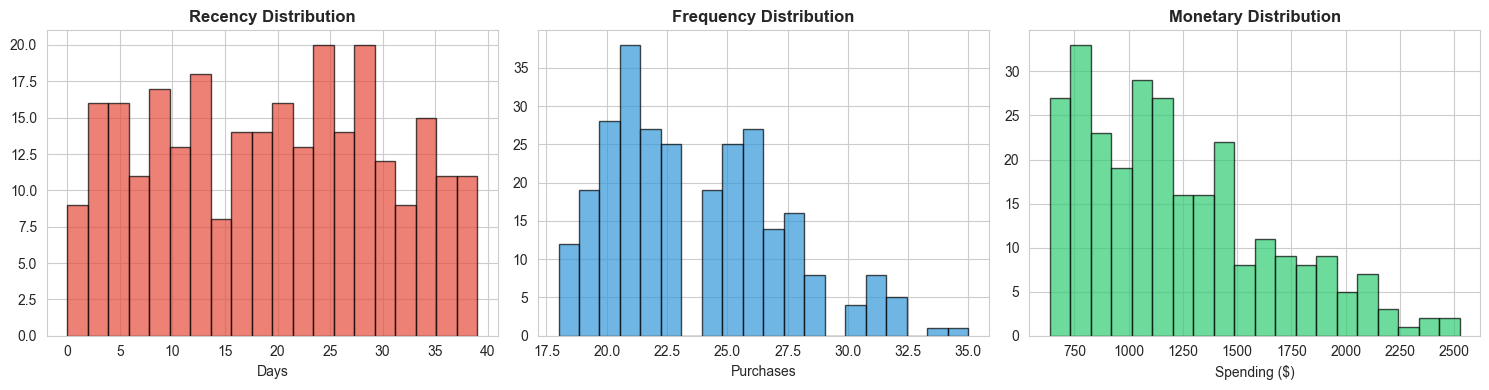

In [13]:
def explore_segment(segment_name, n_examples=5):
    """
    Display detailed information about a specific segment
    """
    segment_data = df[df['Customer_Segment'] == segment_name]
    
    print("=" * 80)
    print(f"SEGMENT: {segment_name}")
    print("=" * 80)
    
    print(f"\n📊 Segment Size: {len(segment_data):,} customers ({len(segment_data)/len(df)*100:.2f}%)")
    
    print(f"\n💰 Financial Metrics:")
    print(f"  • Average Spending: ${segment_data['M_Value'].mean():,.2f}")
    print(f"  • Total Revenue: ${segment_data['M_Value'].sum():,.2f}")
    print(f"  • Average Purchases: {segment_data['F_Value'].mean():.1f}")
    
    print(f"\n📅 Engagement Metrics:")
    print(f"  • Average Recency: {segment_data['R_Value'].mean():.0f} days")
    print(f"  • Average RFM Score: {segment_data['RFM_Score'].mean():.2f}/15")
    
    print(f"\n👤 Demographics:")
    print(f"  • Average Age: {segment_data['Age'].mean():.1f} years")
    print(f"  • Average Income: ${segment_data['Income'].mean():,.0f}")
    
    print(f"\n📋 Sample Customers:")
    sample = segment_data[['ID', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score', 
                           'Age', 'Income', 'Total_Spending']].head(n_examples)
    display(sample)
    
    # Create mini visualization
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    axes[0].hist(segment_data['R_Value'], bins=20, color='#e74c3c', alpha=0.7, edgecolor='black')
    axes[0].set_title('Recency Distribution', fontweight='bold')
    axes[0].set_xlabel('Days')
    
    axes[1].hist(segment_data['F_Value'], bins=20, color='#3498db', alpha=0.7, edgecolor='black')
    axes[1].set_title('Frequency Distribution', fontweight='bold')
    axes[1].set_xlabel('Purchases')
    
    axes[2].hist(segment_data['M_Value'], bins=20, color='#2ecc71', alpha=0.7, edgecolor='black')
    axes[2].set_title('Monetary Distribution', fontweight='bold')
    axes[2].set_xlabel('Spending ($)')
    
    plt.tight_layout()
    plt.show()

# Example: Explore Champions segment
explore_segment('Champions')


SEGMENT: Loyal Customers

📊 Segment Size: 244 customers (10.95%)

💰 Financial Metrics:
  • Average Spending: $951.64
  • Total Revenue: $232,201.00
  • Average Purchases: 22.4

📅 Engagement Metrics:
  • Average Recency: 42 days
  • Average RFM Score: 11.74/15

👤 Demographics:
  • Average Age: 57.3 years
  • Average Income: $64,268

📋 Sample Customers:


,ID,R_Score,F_Score,M_Score,RFM_Score,Age,Income,Total_Spending
0,5524,3,5,5,13,67,58138.0,1617
6,965,4,4,3,11,53,55635.0,590
21,5376,3,5,5,13,45,2447.0,1730
23,4047,5,4,3,12,70,65324.0,544
39,2968,3,5,4,12,81,48948.0,902


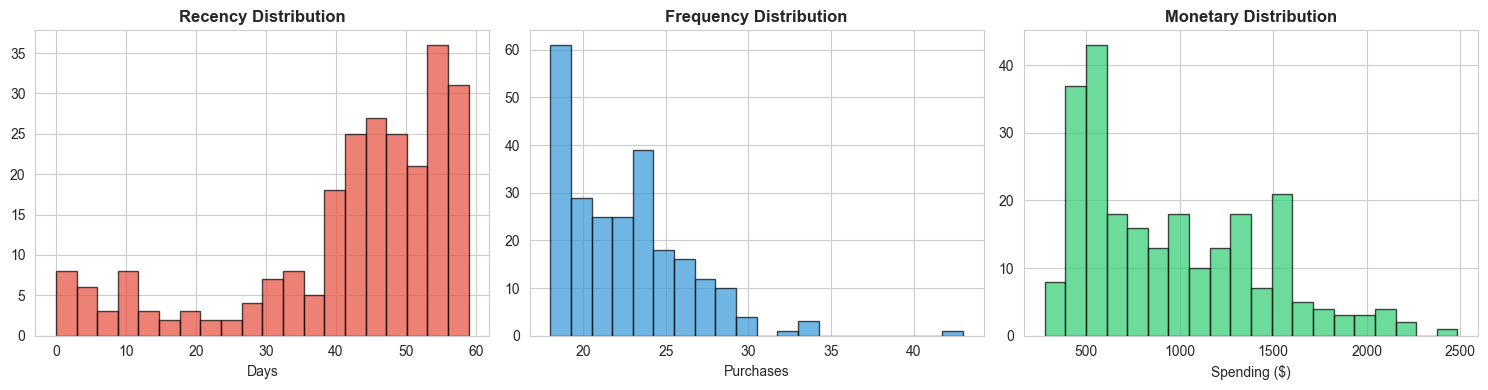

In [14]:
explore_segment('Loyal Customers')

SEGMENT: At Risk

📊 Segment Size: 275 customers (12.34%)

💰 Financial Metrics:
  • Average Spending: $532.32
  • Total Revenue: $146,389.00
  • Average Purchases: 15.7

📅 Engagement Metrics:
  • Average Recency: 82 days
  • Average RFM Score: 7.67/15

👤 Demographics:
  • Average Age: 57.1 years
  • Average Income: $53,490

📋 Sample Customers:


,ID,R_Score,F_Score,M_Score,RFM_Score,Age,Income,Total_Spending
4,5324,1,4,3,8,43,58293.0,422
12,2125,1,3,4,8,65,63033.0,1102
19,2278,1,2,2,5,39,33812.0,133
22,1993,2,3,4,9,75,58607.0,972
24,1409,2,4,3,9,73,40689.0,444


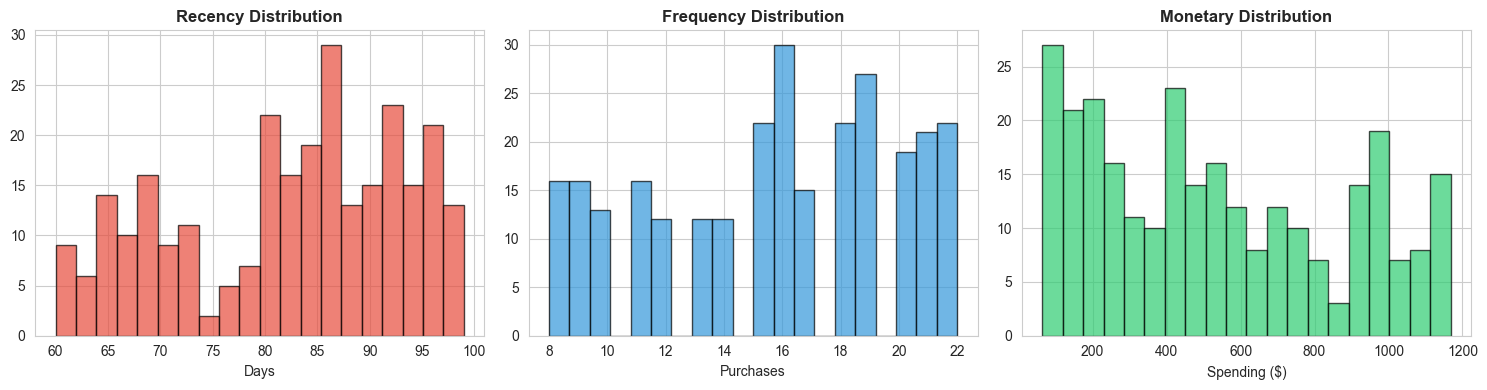

In [15]:
explore_segment('At Risk')

SEGMENT: Potential Loyalists

📊 Segment Size: 335 customers (15.03%)

💰 Financial Metrics:
  • Average Spending: $435.04
  • Total Revenue: $145,739.00
  • Average Purchases: 12.6

📅 Engagement Metrics:
  • Average Recency: 19 days
  • Average RFM Score: 9.90/15

👤 Demographics:
  • Average Age: 54.6 years
  • Average Income: $47,689

📋 Sample Customers:


,ID,R_Score,F_Score,M_Score,RFM_Score,Age,Income,Total_Spending
3,6182,4,2,1,7,40,26646.0,53
7,6177,4,2,2,8,39,33454.0,169
17,4939,4,3,3,10,78,37760.0,317
26,2404,5,3,3,11,48,53359.0,257
28,9422,4,2,2,8,35,38360.0,131


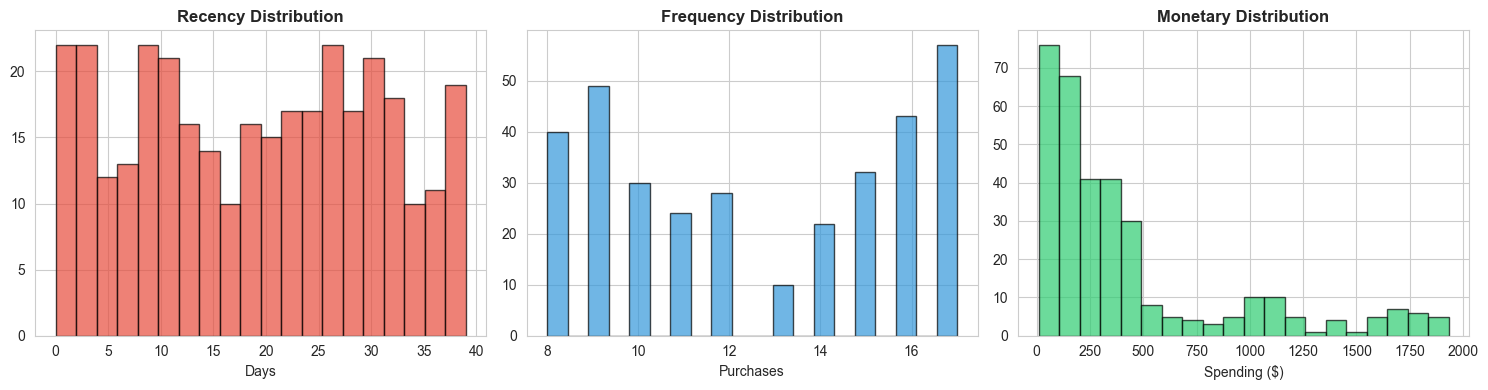

In [16]:
explore_segment('Potential Loyalists')

SEGMENT: New Customers

📊 Segment Size: 224 customers (10.05%)

💰 Financial Metrics:
  • Average Spending: $43.47
  • Total Revenue: $9,738.00
  • Average Purchases: 5.4

📅 Engagement Metrics:
  • Average Recency: 19 days
  • Average RFM Score: 6.81/15

👤 Demographics:
  • Average Age: 52.0 years
  • Average Income: $31,949

📋 Sample Customers:


,ID,R_Score,F_Score,M_Score,RFM_Score,Age,Income,Total_Spending
1,2174,4,1,1,6,70,46344.0,27
8,4855,5,1,1,7,50,30351.0,46
10,1994,5,1,1,7,41,51381.5,19
14,2569,4,1,1,6,37,17323.0,46
42,8430,5,1,1,7,67,21994.0,22


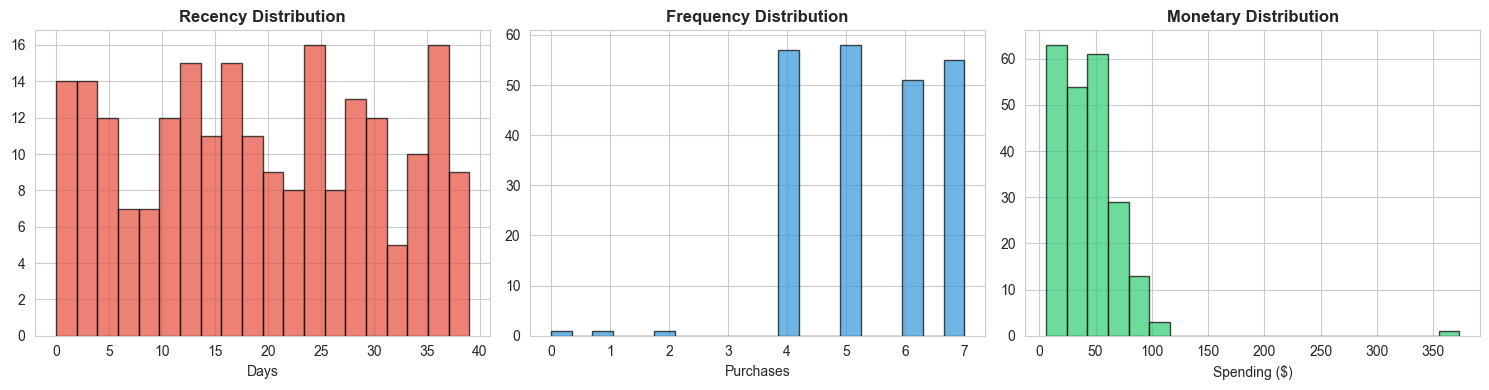

In [17]:
explore_segment('New Customers')

SEGMENT: Promising

📊 Segment Size: 177 customers (7.94%)

💰 Financial Metrics:
  • Average Spending: $63.23
  • Total Revenue: $11,191.00
  • Average Purchases: 6.8

📅 Engagement Metrics:
  • Average Recency: 49 days
  • Average RFM Score: 5.78/15

👤 Demographics:
  • Average Age: 52.5 years
  • Average Income: $32,634

📋 Sample Customers:


,ID,R_Score,F_Score,M_Score,RFM_Score,Age,Income,Total_Spending
11,387,3,1,2,6,48,7500.0,61
16,9736,3,2,2,7,44,41850.0,96
35,10738,3,1,2,6,73,49389.0,65
52,1331,3,1,2,6,47,35790.0,72
58,8557,3,1,1,5,42,51381.5,46


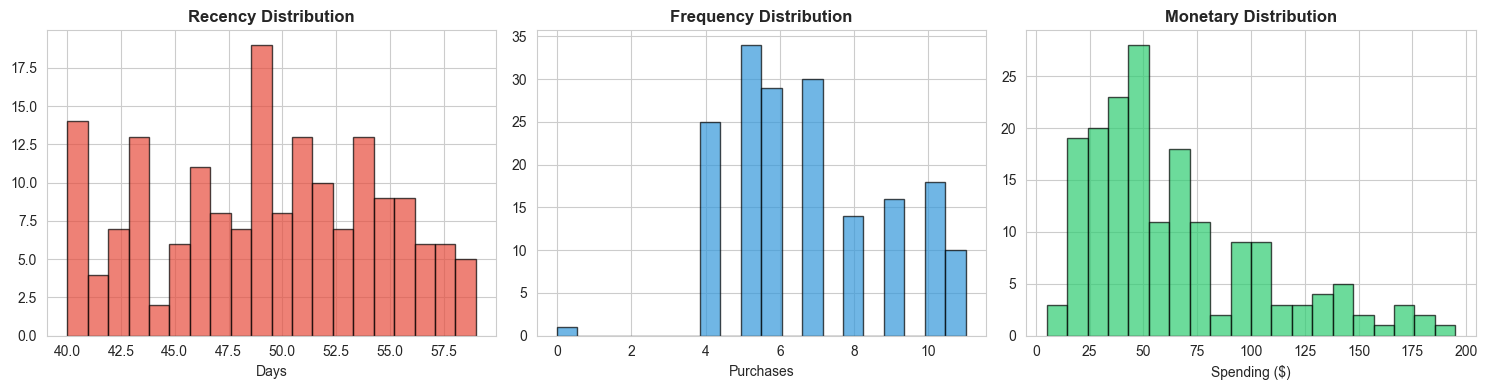

In [18]:
explore_segment('Promising')

SEGMENT: Need Attention

📊 Segment Size: 158 customers (7.09%)

💰 Financial Metrics:
  • Average Spending: $243.02
  • Total Revenue: $38,397.00
  • Average Purchases: 12.6

📅 Engagement Metrics:
  • Average Recency: 63 days
  • Average RFM Score: 7.60/15

👤 Demographics:
  • Average Age: 55.0 years
  • Average Income: $43,221

📋 Sample Customers:


,ID,R_Score,F_Score,M_Score,RFM_Score,Age,Income,Total_Spending
13,8180,3,3,3,9,72,59354.0,310
20,9360,3,3,3,9,42,37040.0,316
31,3033,3,2,3,8,61,38620.0,318
37,10755,2,2,2,6,48,23718.0,81
83,4119,3,2,3,8,61,38620.0,318


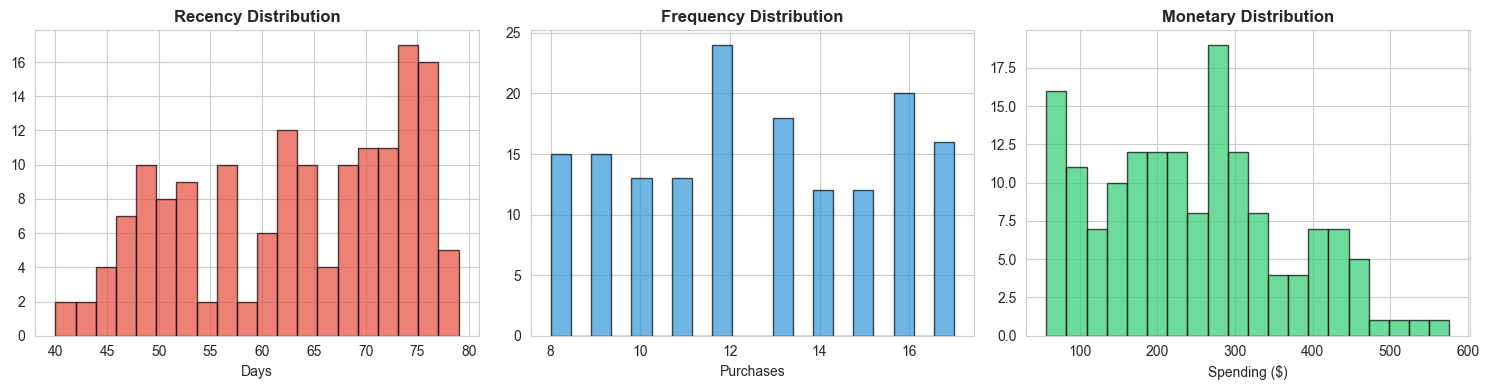

In [19]:
explore_segment('Need Attention')

SEGMENT: About to Sleep

📊 Segment Size: 107 customers (4.80%)

💰 Financial Metrics:
  • Average Spending: $45.93
  • Total Revenue: $4,914.00
  • Average Purchases: 5.8

📅 Engagement Metrics:
  • Average Recency: 70 days
  • Average RFM Score: 4.35/15

👤 Demographics:
  • Average Age: 52.0 years
  • Average Income: $31,886

📋 Sample Customers:


,ID,R_Score,F_Score,M_Score,RFM_Score,Age,Income,Total_Spending
9,5899,2,1,1,4,74,5648.0,49
65,8082,2,1,1,4,53,25721.0,34
75,5846,2,1,1,4,47,40246.0,13
93,11178,2,1,1,4,52,42394.0,32
122,8442,2,1,1,4,39,19510.0,30


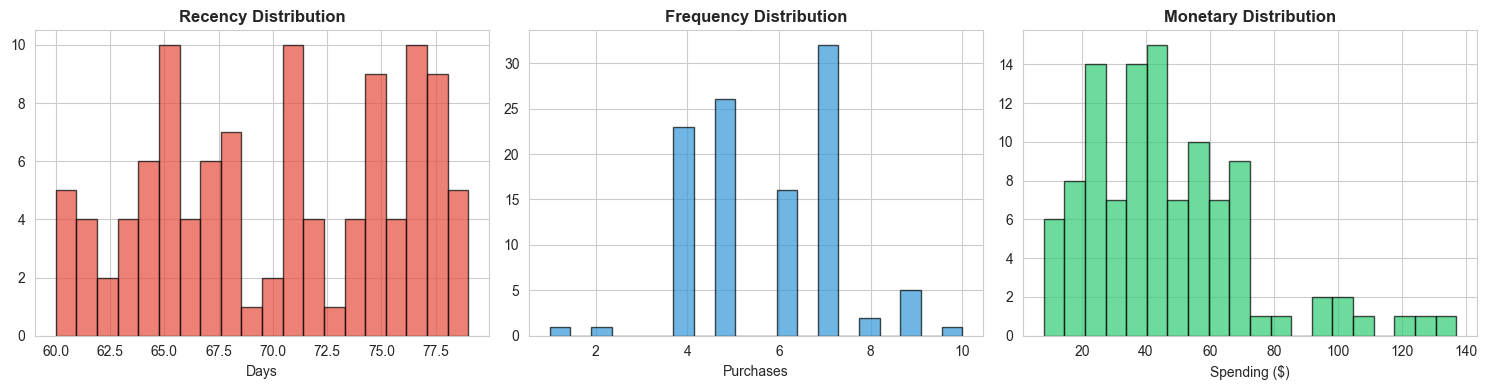

In [20]:
explore_segment('About to Sleep')

SEGMENT: Cannot Lose Them

📊 Segment Size: 239 customers (10.72%)

💰 Financial Metrics:
  • Average Spending: $1,367.33
  • Total Revenue: $326,793.00
  • Average Purchases: 23.8

📅 Engagement Metrics:
  • Average Recency: 79 days
  • Average RFM Score: 10.78/15

👤 Demographics:
  • Average Age: 56.7 years
  • Average Income: $71,379

📋 Sample Customers:


,ID,R_Score,F_Score,M_Score,RFM_Score,Age,Income,Total_Spending
18,6565,1,5,5,11,75,76995.0,1782
29,1966,1,5,5,11,59,84618.0,1672
69,1357,1,4,5,10,54,74854.0,1562
73,8132,1,5,4,10,49,60631.0,661
88,8504,2,4,5,11,51,79593.0,1366


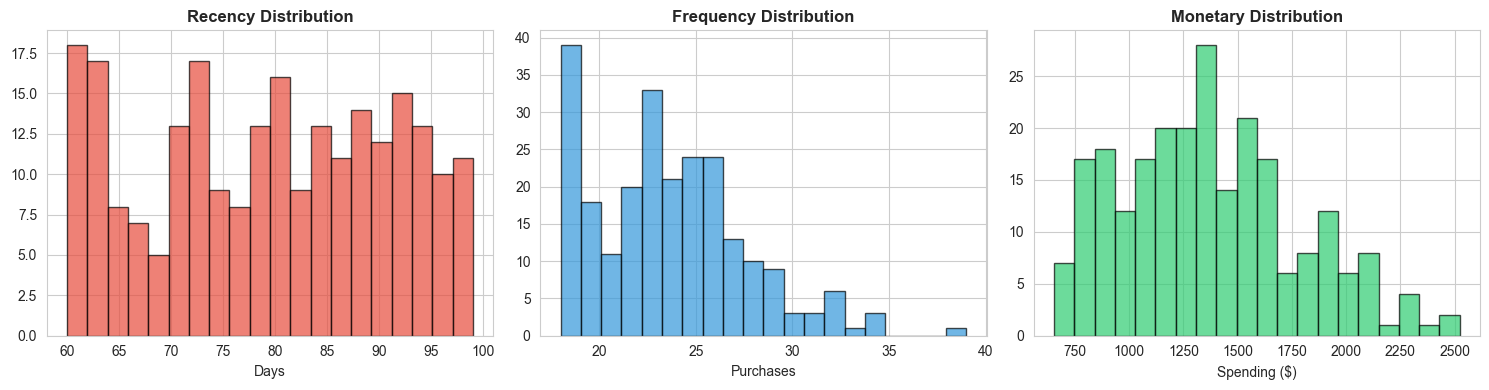

In [21]:
explore_segment('Cannot Lose Them')

SEGMENT: Hibernating

📊 Segment Size: 123 customers (5.52%)

💰 Financial Metrics:
  • Average Spending: $70.55
  • Total Revenue: $8,678.00
  • Average Purchases: 6.1

📅 Engagement Metrics:
  • Average Recency: 89 days
  • Average RFM Score: 3.46/15

👤 Demographics:
  • Average Age: 52.0 years
  • Average Income: $34,177

📋 Sample Customers:


,ID,R_Score,F_Score,M_Score,RFM_Score,Age,Income,Total_Spending
38,8595,1,1,2,4,51,42429.0,67
41,503,1,1,1,3,39,20559.0,53
47,7286,1,1,1,3,56,41728.0,55
85,5268,1,1,2,4,64,29440.0,56
94,2230,1,2,1,4,54,23626.0,43


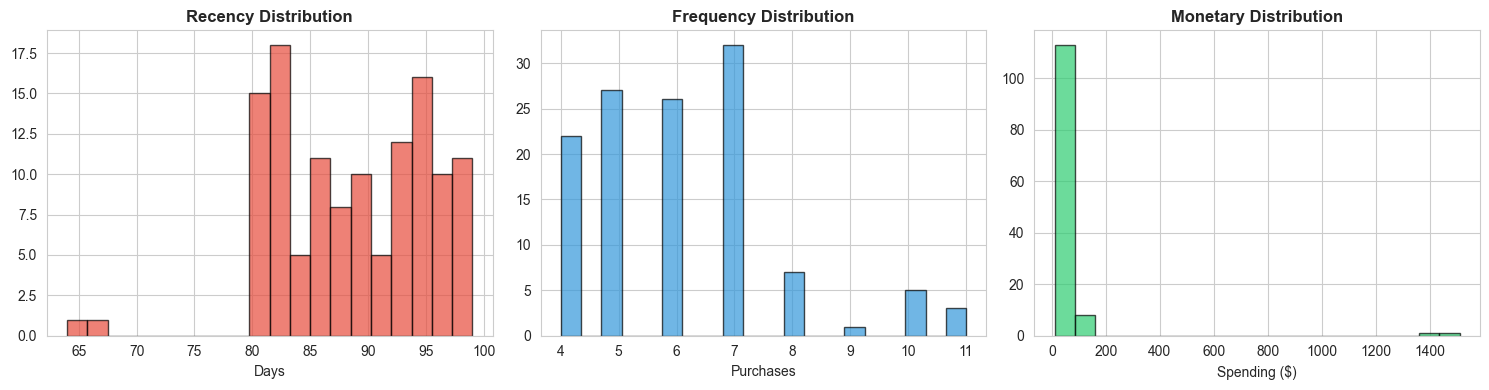

In [22]:
explore_segment('Hibernating')

SEGMENT: Others

📊 Segment Size: 70 customers (3.14%)

💰 Financial Metrics:
  • Average Spending: $1,240.97
  • Total Revenue: $86,868.00
  • Average Purchases: 16.1

📅 Engagement Metrics:
  • Average Recency: 64 days
  • Average RFM Score: 9.79/15

👤 Demographics:
  • Average Age: 58.6 years
  • Average Income: $67,822

📋 Sample Customers:


,ID,R_Score,F_Score,M_Score,RFM_Score,Age,Income,Total_Spending
111,7431,3,3,5,11,33,68126.0,1820
167,6637,3,3,4,10,36,66951.0,1117
195,9938,1,3,5,9,70,80067.0,1600
212,0,2,3,5,10,39,70951.0,1198
219,2075,3,3,4,10,55,72460.0,1047


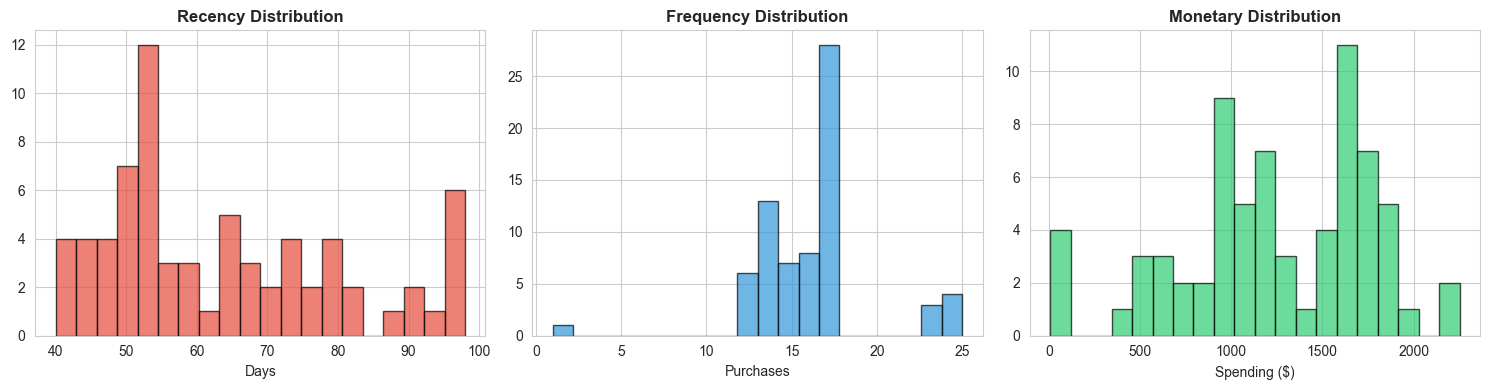

In [23]:
explore_segment('Others')

In [30]:
# Save the RFM analyzed dataset
!pip install fsspec
output_path = 'D://My projects/customer_segmentation_project/data/processed/step2_rfm_analyzed.csv'
df.to_csv(output_path, index=False)

# Save reports
segment_analysis = df.groupby('Customer_Segment').agg({
    'R_Value': 'mean',
    'F_Value': 'mean',
    'M_Value': ['mean', 'sum'],
    'RFM_Score': 'mean',
    'Age': 'mean',
    'Income': 'mean'
}).round(2)

segment_analysis.to_csv('D://My projects/customer_segmentation_project\outputs/reports/step2_segment_analysis.csv')

print(f"✓ RFM analyzed data saved to: {output_path}")
print(f"  Shape: {df.shape[0]:,} rows, {df.shape[1]} columns")
print(f"\n✓ All outputs saved to outputs/ directory")

✓ RFM analyzed data saved to: D://My projects/customer_segmentation_project/data/processed/step2_rfm_analyzed.csv
  Shape: 2,229 rows, 43 columns

✓ All outputs saved to outputs/ directory
